# Machine Learning in Python - Group Project 2


Contributors:
* Thomas Lanning
* Alexander Bohane
* Mengyao Zhang
* Shangyun Sun

## General Setup

In [84]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np
import calendar

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn modules
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [85]:
# Load data
d = pd.read_csv("hotel.csv")

For the details about data set;

- please check the Project Description pdf file and related article from the Learn page. 

## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client).* 

- If you use any additional data sources, you should introduce them here and discuss why they were included.

- Briefly outline the approaches being used and the conclusions that you are able to draw.

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling.* 

- Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. 
- Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data.*

- Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. 
- Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

**All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.**

### 2.1 Exploratory Data Analysis

#### 2.1.1 Data Overview

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

`children`, `country`, `agent`, `company` missing value

arrival_data_month and day_of_month known, week ? month object

agent, company, float?

In [5]:
d.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


1. date(year, week, day) ok
2. adr min negative?
3. adult, children 0 

#### 2.1.2 Data Cleaning

In [86]:
d['agent'] = d['agent'].fillna(0)
d['company'] = d['company'].fillna(0)

undefined

In [87]:
d.loc[d['meal'] == 'Undefined', 'meal'] = 'SC'

other undefined

In [88]:
d.replace('Undefined', np.nan, inplace = True)

Nan

In [89]:
null = d.isnull().sum()
null[null.values != 0]

children                  4
country                 488
market_segment            2
distribution_channel      5
dtype: int64

small proportion (499/119390)

In [90]:
d = d.dropna()

adr nagative

In [91]:
d = d[d['adr'] >= 0]
len(d)

118896

people

In [92]:
d.drop(d[d.adults + d.children == 0].index, inplace = True)
len(d)

118726

type

In [93]:
d[['agent', 'company']] = d[['agent', 'company']].astype(int).astype(str)

After cleaning,

In [94]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118726 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118726 non-null  int64  
 1   hotel                           118726 non-null  object 
 2   lead_time                       118726 non-null  int64  
 3   arrival_date_year               118726 non-null  int64  
 4   arrival_date_month              118726 non-null  object 
 5   arrival_date_week_number        118726 non-null  int64  
 6   arrival_date_day_of_month       118726 non-null  int64  
 7   stays_in_weekend_nights         118726 non-null  int64  
 8   stays_in_week_nights            118726 non-null  int64  
 9   adults                          118726 non-null  int64  
 10  children                        118726 non-null  float64
 11  babies                          118726 non-null  int64  
 12  meal            

#### 2.1.3 Numerical Features Analysis

num + is_concel

In [15]:
num_data = d.select_dtypes(include = ['int', 'float'])
num_data.shape

(118726, 18)

<AxesSubplot:>

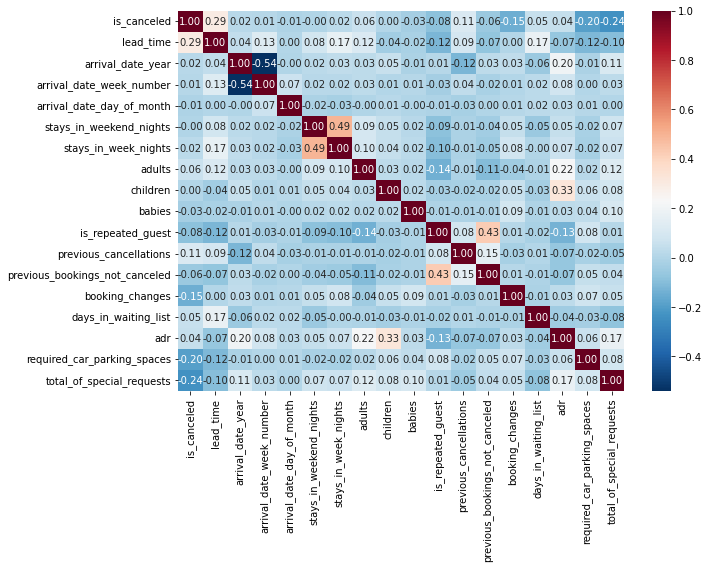

In [228]:
corr = num_data.corr()
sns.set_context({'figure.figsize': [10,7]})
sns.heatmap(corr,cmap = 'RdBu_r', annot = True, fmt = '.2f')

1. is_canceled: lead_time high positive, total_of_special_requests negative correlation. booking_changes and required_car_parking_spaces
2. week and year high.
3. stay_in_week_nights and stay_in_weekend_nights, relatively high; others, low correlation
4. orange 2

focus on the influence of lead_time, total_of_special_requests, booking_changes and required_car_parking_spaces on cancellation. In order to..., cancel_rate function

In [17]:
def cancel_by_group(d, feature_name):
    name_list = d[feature_name].drop_duplicates().values
    total = []
    cancel = []
    for name in name_list:
        total.append(len(d[d[feature_name] == name]))
        cancel.append(len(d[(d[feature_name] == name) & (d['is_canceled'] == 1)]))
    cancel_rate = [round(a / b, 2) for a, b in zip(cancel, total)]
    feature_cancel = pd.DataFrame({feature_name: name_list, 'total_booking': total, 
                               'cancellation_rate': cancel_rate})
    sort_value = feature_cancel.sort_values(by = ['total_booking'], ascending = False)
    return sort_value

**lead_time**

<AxesSubplot:xlabel='lead_time', ylabel='cancellation_rate'>

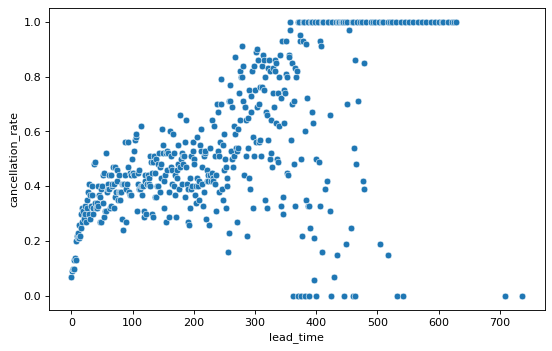

In [50]:
lt_c = cancel_by_group(num_data, 'lead_time').sort_values(by = ['lead_time'])
sns.set_context({'figure.figsize': [8,5]})
sns.scatterplot(x = 'lead_time', y = 'cancellation_rate', data = lt_c)
# label and title

1. <100, increase
2. 100-200, fluctuate
3. longer, large range of fluctuation
4. after 500, only have 0 and 1, may because little data. 

**total_of_special_requests**

<AxesSubplot:xlabel='total_of_special_requests', ylabel='cancellation_rate'>

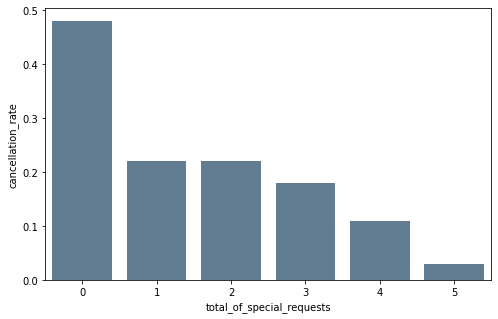

In [229]:
req_c = cancel_by_group(num_data, 'total_of_special_requests').sort_values(by = ['total_of_special_requests'])
sns.barplot(x = 'total_of_special_requests', y = 'cancellation_rate', data = req_c, color = sns.xkcd_rgb['steel blue'])

decrease

**required_car_parking_spaces**

In [20]:
cancel_by_group(num_data, 'required_car_parking_spaces').sort_values(by = ['required_car_parking_spaces'])

,required_car_parking_spaces,total_booking,cancellation_rate
0,0,111424,0.4
1,1,7269,0.0
2,2,28,0.0
4,3,3,0.0
3,8,2,0.0


have requirement on car parking, no cancellation. But small sample size, may be not general.

**booking_changes**

from describe, discrete distribution, select attributes with enough data (>100).

In [21]:
bc_c = cancel_by_group(num_data, 'booking_changes').sort_values(by = ['booking_changes'])
bc_c_d = bc_c[bc_c['total_booking'] > 100]
sum(bc_c_d['total_booking'])/sum(bc_c['total_booking'])

0.9988545053316039

count for 99.999%. plot

<AxesSubplot:xlabel='booking_changes', ylabel='cancellation_rate'>

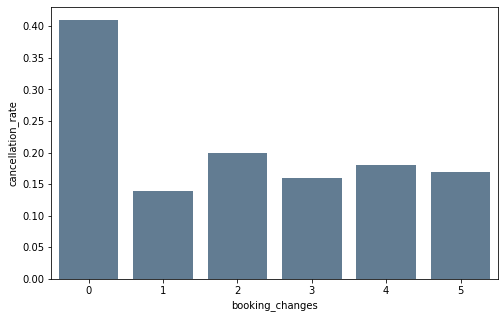

In [223]:
sns.barplot(x = 'booking_changes', y = 'cancellation_rate', data = bc_c_d, color = sns.xkcd_rgb['steel blue'])

obvious difference between bookings with and without changes

#### 2.1.4 Categorical Features

In [23]:
cg_data = d.select_dtypes(include = ['object'])
cg_features = cg_data.columns
cg_data = pd.concat([cg_data, pd.DataFrame({'is_canceled': d['is_canceled']})], axis = 1)

In [24]:
cg_features

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type'],
      dtype='object')

We have 12 categorical features.

**hotel**

...

In [25]:
cancel_by_group(cg_data, 'hotel')

,hotel,total_booking,cancellation_rate
1,City Hotel,79143,0.42
0,Resort Hotel,39583,0.28


total_booking diff

obvious difference in cancellation_rate.

diff in numerical features

In [26]:
data_hotel = d.groupby('hotel').mean()
data_hotel

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,
City Hotel,0.417738,109.877475,2016.174456,27.171992,15.788787,0.794246,2.180673,1.854845,0.091581,0.004953,0.024980,0.079843,0.132368,0.184059,3.232301,105.514645,0.024348,0.547048
Resort Hotel,0.279842,93.449915,2016.123892,27.151732,15.825860,1.196246,3.141121,1.873456,0.129879,0.013971,0.044792,0.101938,0.130056,0.288306,0.527954,95.375476,0.137003,0.621201


1. city with longer lead_time
2. resort stay longer
3. resort children and babies more
4. resort repeated more
5. resort changes, car_parking, and requests more
6. city waiting_list longer, probably because full, waiting for cancellation.

later analysis of categorical features, distinguish type, function

In [27]:
def hotel_cancel(d, feature_name):
    resort = cancel_by_group(d[d['hotel'] == 'Resort Hotel'], feature_name).sort_values(by = [feature_name])
    city = cancel_by_group(d[d['hotel'] == 'City Hotel'], feature_name).sort_values(by = [feature_name])
    hotel_type = ['']
    resort_cancel = pd.DataFrame({feature_name: resort[feature_name], 
                                  'total_booking': resort['total_booking'],
                                  'cancellation_rate': resort['cancellation_rate'],
                                  'hotel_type': 'Resort hotel'})
    city_cancel = pd.DataFrame({feature_name: city[feature_name], 
                                'total_booking': city['total_booking'],
                                'cancellation_rate': city['cancellation_rate'],
                                'hotel_type': 'City hotel'})
    cancel = pd.concat([resort_cancel, city_cancel], ignore_index=True)
    return cancel

**arrival_date_month**

In [173]:
month_num_list = list(range(1, 13))
month_name_list = [calendar.month_name[i] for i in month_num_list]

<AxesSubplot:xlabel='arrival_date_month', ylabel='cancellation_rate'>

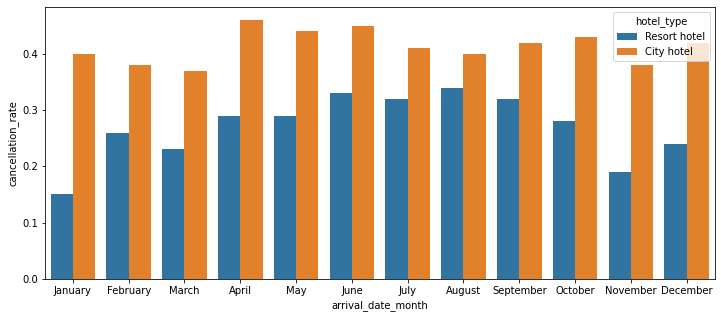

In [171]:
hotel_month = hotel_cancel(cg_data, 'arrival_date_month')
sns.set_context({'figure.figsize': [12,5]})
sns.barplot(x = 'arrival_date_month', y = "cancellation_rate" , hue="hotel_type", data = hotel_month, order = month_name_list)

resort

**meal**

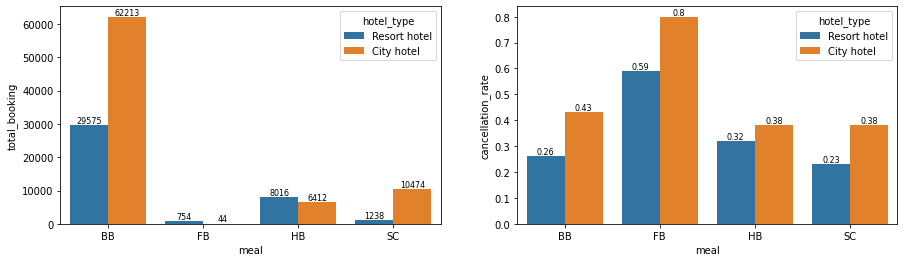

In [222]:
hotel_meal = hotel_cancel(cg_data, 'meal')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'meal', y = 'total_booking' , hue = 'hotel_type', data = hotel_meal)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'meal', y = 'cancellation_rate' , hue='hotel_type', data = hotel_meal)
for i in ax2.containers:
    ax2.bar_label(i, fontsize = 8)

city and resort have similar trend but city overall higher. FB have higher rate, the others are similar.

**country**

In [58]:
country_c = cancel_by_group(cg_data, 'country')
country_c.describe()

,total_booking,cancellation_rate
count,177.000000,177.000000
mean,670.768362,0.302881
std,3922.879385,0.298654
min,1.000000,0.000000
25%,2.000000,0.000000
50%,12.000000,0.250000
75%,74.000000,0.460000
max,48478.000000,1.000000


too many country, filter

not consider hotel type

In [33]:
country_c_d = country_c[country_c['total_booking'] > 1000]
sum(country_c_d['total_booking'])/sum(country_c['total_booking'])

0.9098765224129508

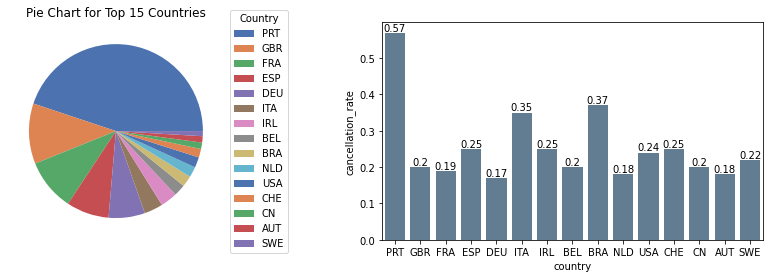

In [221]:
sns.set_context({'figure.figsize': [10,5]})
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
colors = sns.color_palette('deep')
wedges, text = plt.pie(country_c_d['total_booking'], colors = colors)
plt.legend(wedges, country_c_d['country'], title = 'Country', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('Pie Chart for Top 15 Countries')
fig.add_subplot(1, 2, 2)
ax = sns.barplot(x = 'country', y = 'cancellation_rate', data = country_c_d, color = sns.xkcd_rgb['steel blue'])
for i in ax.containers:
    ax.bar_label(i)

PRT; ITA and BRA; others; others(0)

**market_segment**

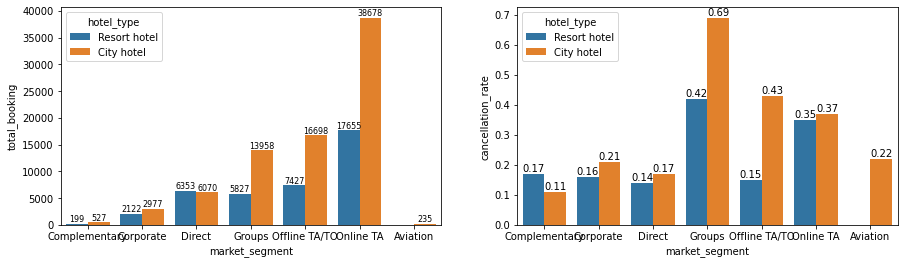

In [183]:
hotel_market = hotel_cancel(cg_data, 'market_segment')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'market_segment', y = 'total_booking' , hue = 'hotel_type', data = hotel_market)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'market_segment', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_market)
for i in ax2.containers:
    ax2.bar_label(i)

1. resort don't have aviation.
2. Offline TA/TO has high rate in city but low in resort.
3. city high in all exclude complementary.

**distribution_channel**

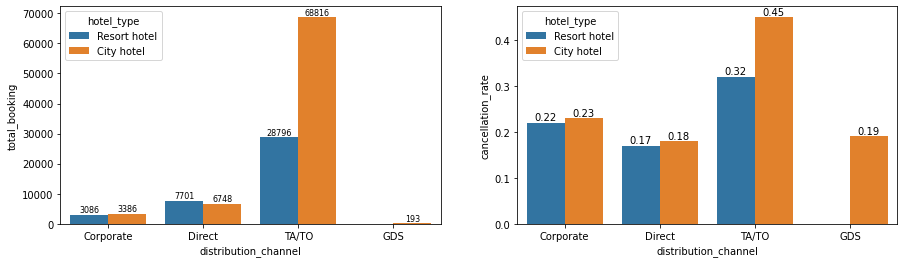

In [182]:
hotel_channel = hotel_cancel(cg_data, 'distribution_channel')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'distribution_channel', y = 'total_booking' , hue = 'hotel_type', data = hotel_channel)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'distribution_channel', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_channel)
for i in ax2.containers:
    ax2.bar_label(i)

1. resort don't have GDS
2. TA/TO much higher than others.

**room_type**

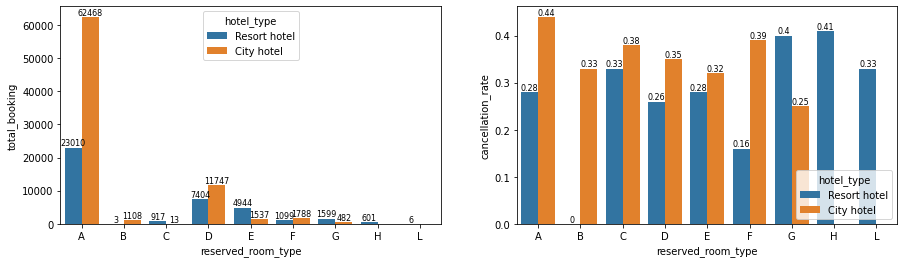

In [75]:
hotel_rm = hotel_cancel(cg_data, 'reserved_room_type')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'reserved_room_type', y = 'total_booking' , hue = 'hotel_type', data = hotel_rm)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'reserved_room_type', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_rm)
ax2.legend(loc = 'lower right', title = 'hotel_type')
for i in ax2.containers:
    ax2.bar_label(i, fontsize = 8)

1. city don't have H and L, resort B very few.
2. city A largest and highest, resort H highest but small, A largest too but much lower.
3. city all high exclude G

assigned different room

In [39]:
cg_data['same_room_type'] = cg_data['reserved_room_type'] == cg_data['assigned_room_type']

In [40]:
hotel_cancel(cg_data, 'same_room_type')

,same_room_type,total_booking,cancellation_rate,hotel_type
0,False,7499,0.05,Resort hotel
1,True,32084,0.33,Resort hotel
2,False,7078,0.06,City hotel
3,True,72065,0.45,City hotel


same but cancel, strange. counter-intuitive, probably no influence.

**deposit_type**

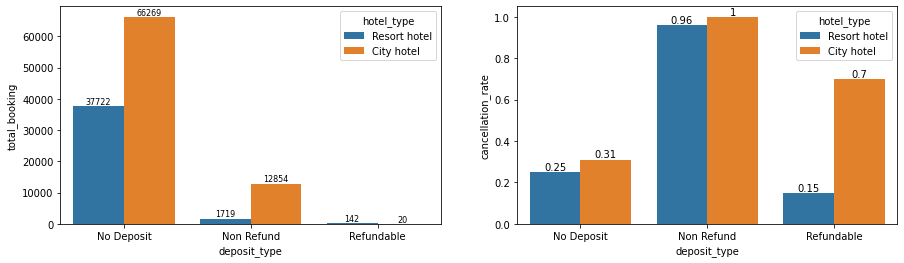

In [181]:
hotel_deposit = hotel_cancel(cg_data, 'deposit_type')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'deposit_type', y = 'total_booking' , hue = 'hotel_type', data = hotel_deposit)
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 8)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'deposit_type', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_deposit)
for i in ax2.containers:
    ax2.bar_label(i)

1. strange: non refund highest.
2. refundable city high.

In [42]:
data_deposit = d.groupby('deposit_type').mean()
data_deposit

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
deposit_type,,,,,,,,,,,,,,,,,,
No Deposit,0.284852,89.117529,2016.175159,27.137195,15.817965,0.971074,2.557885,1.867960,0.119001,0.009087,0.035407,0.041850,0.148724,0.247146,1.524901,103.876796,0.070477,0.652316
Non Refund,0.993618,212.928018,2016.032457,27.434639,15.596034,0.622315,2.090235,1.811226,0.000618,0.000000,0.004392,0.411858,0.010636,0.012489,7.999931,89.988000,0.000069,0.001784
Refundable,0.222222,152.098765,2016.141975,20.932099,23.456790,0.975309,2.851852,1.907407,0.030864,0.000000,0.024691,0.000000,0.018519,0.592593,9.586420,76.209753,0.123457,0.141975


1. lead_time long
2. stay time short
3. children and babies few
4. few repeated
5. high previous_cancellations and low previous_bookings_not_canceled
6. little changes
7. little required_car_parking_spaces and total_of_special_requests

guess: business trip

In [43]:
nonrefund = cg_data[cg_data['deposit_type'] == 'Non Refund']
len(nonrefund)

14573

In [44]:
nonrefund[nonrefund['company'] != '0'].shape

(506, 14)

can't explain. may be excluded from our model.

**agent and company**

large booking,1.general, 2.more cooperation, more concerned.

total_booking decrease

In [112]:
hotel_agent = hotel_cancel(cg_data, 'agent')
hotel_agent.describe()

,total_booking,cancellation_rate
count,409.000000,409.000000
mean,290.283619,0.241809
std,1863.786785,0.312919
min,1.000000,0.000000
25%,2.000000,0.000000
50%,19.000000,0.100000
75%,76.000000,0.390000
max,31915.000000,1.000000


In [138]:
hotel_agent_d = hotel_agent[hotel_agent['total_booking'] > 500]
print('There are', len(hotel_agent_d['agent'].drop_duplicates()), 'agents that have more than 500 bookings in one hotel,')
print('and they take up of', round(sum(hotel_agent_d['total_booking'])/sum(hotel_agent['total_booking'])*100, 2),'%',
      'bookings in all bookings of these two hotels.')

There are 26 agents that have more than 500 bookings in one hotel,
and they take up of 83.2 % bookings in all bookings of these two hotels.


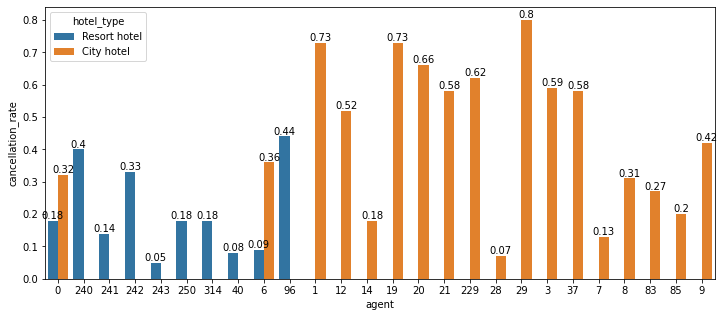

In [177]:
sns.set_context({'figure.figsize': [12,5]})
ax = sns.barplot(x = 'agent', y = 'cancellation_rate' , hue='hotel_type', data = hotel_agent_d)
for i in ax.containers:
    ax.bar_label(i)

1. agent large booking focus on one hotel.
2. city large booking, consistent with before
3. city agent high rate

analysis.

similarly, company

In [46]:
hotel_cancel(cg_data, 'company').sort_values(by = ['total_booking'], ascending = False).head(6)

,company,total_booking,cancellation_rate,hotel_type
233,0,75477,0.43,City hotel
0,0,36645,0.29,Resort hotel
371,40,921,0.08,City hotel
43,223,784,0.15,Resort hotel
422,67,267,0.66,City hotel
397,45,249,0.11,City hotel


most (112122/118726) not company. 40(city) and 223(resort) relatively large and low cancellation.

**customer_type**

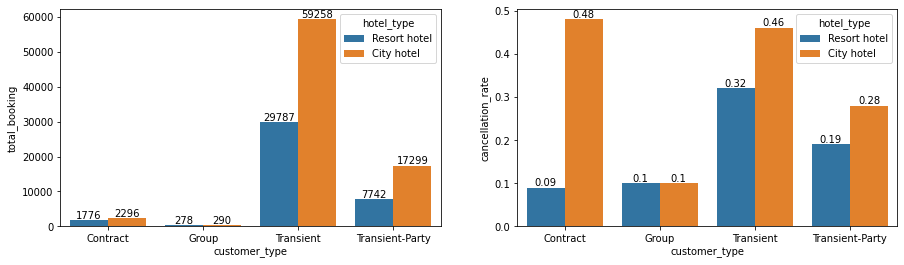

In [179]:
hotel_cus = hotel_cancel(cg_data, 'customer_type')
fig = plt.figure(figsize=(15, 4))
fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(x = 'customer_type', y = 'total_booking' , hue = 'hotel_type', data = hotel_cus)
for i in ax1.containers:
    ax1.bar_label(i)
fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x = 'customer_type', y = 'cancellation_rate' , hue = 'hotel_type', data = hotel_cus)
for i in ax2.containers:
    ax2.bar_label(i)

1. group small
2. contract diff large and high rate of city, but total_booking small
3. Transient higher rate

### 2.2 Feature Engineering

#### 2.2.1 Features Eliminated
* We will eliminate `assigned_room_type`
* We will eliminate `deposit_type`

In [95]:
d = d.drop(columns = ['assigned_room_type', 'deposit_type'])

#### 2.2.2 Features Encoded

`arrrival_date_month`

In [96]:
d.replace(month_name_list, month_num_list, inplace = True)

`country`, `agent`, and `company`

In [103]:
country_list = country_c_d['country'].values

# perform encoding on the country column
encoded = pd.get_dummies(d['country'].apply(lambda x: x if x in country_list else 'Other_country'))

# merge the encoded dataframe with the original dataframe
d = pd.concat([d, encoded], axis = 1)

# drop the original country column and the Other_country since it is indirectly encoded in the other columns
d.drop(['country', 'Other_country'], axis = 1, inplace = True)

In [139]:
agent_list = hotel_agent_d['agent'].drop_duplicates().values
encoded = pd.get_dummies(d['agent'].apply(lambda x: x if x in agent_list else 'Other_agent'))
d = pd.concat([d, encoded], axis = 1)
d.drop(['agent', 'Other_agent'], axis = 1, inplace = True)

In [143]:
company_list = ['0', '40', '223']
encoded = pd.get_dummies(d['company'].apply(lambda x: x if x in company_list else 'Other_company'))
encoded = encoded.rename(columns={'0': '0(company)', '40': '40(company)', '223': '223(company)'})
d = pd.concat([d, encoded], axis = 1)
d.drop(['company', 'Other_company'], axis = 1, inplace = True)

In [150]:
d.iloc[0:1, -40:]

,CN,DEU,ESP,FRA,GBR,IRL,ITA,NLD,PRT,SWE,...,6,7,8,83,85,9,96,0(company),223(company),40(company)
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


12 categorical features, after deleting 2 and encoding the above 4, remain 6. They all have limited (less than ?) catogories, direct OneHotEncode.

In [158]:
onehot_feature = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'customer_type']
onehot_column = []
for feature in onehot_feature:
    onehot_column.append(d.columns.get_loc(feature))
all_column = list(range(0, d.shape[1]))
others_column = list(set(all_column) - set(onehot_column))

63

In [153]:
ONE = OneHotEncoder(drop = 'first')

encoder = ColumnTransformer([
    ('others', 'passthrough', others_column),
    ('onehot', ONE, onehot_column),
])

[1, 12, 13, 14, 18, 21]

In [ ]:
data = encoder.fit_transform(d)

In [ ]:
data

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model.*

- You are strongly encouraged to explore many different modeling methods (e.g. logistic regression, classification trees, SVC, etc.) but you should not include a detailed narrative of all of these attempts. 
- At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.

*For example if you considered a logistic regression model, a classification tree, and a SVC model and ultimately settled on the logistic regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the logistic regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

**This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.**

## 4. Discussion & Conclusions


*In this section you should provide a general overview of **your final model**, its **performance**, and **reliability**.* 

Your report must include the following:

* Some discussion of the features that are most important for predicting a cancelation - we do not need discussion of specific coefficient values but direction of the effect should be clear (e.g. the earlier a booking is made the more likely it is to be canceled).

* A validated assessment of your model's performance, but this must be specifically discussed in the context of bookings and running a hotel. 

* It is not sufficient to report summary statistics like the accuracy or AUC - you must address the perfomance in terms of potential gains and losses for the hotel (e.g. think about what happens if your model predicts a cancelation that does not actually occur and a room ends up being double booked or vice versa). 

* Explain why you think your particular model would or would not be economically viable.

## 5. References

*In this section, you should present a list of external sources (except the course materials) that you used during the project, if any*

- Additional data sources can be cited here, in addition to related python documentations, any other webpage sources that you benefited from